In [1]:
################ Excercise 4.2 ################

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# Load the mnist dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
# Read in the mnist digit images and corresponding numbers
# ---------------------------------------------------------------------------
# The procedure here is similar to the notebooks we did last week. Use Hint 1 to store the input and target data.
X = mnist['data']
y = mnist['target']

In [4]:
# Import train_test_split() to create your training and test sets
# ---------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

# Now separate your X and y into training and test sets (use train_test_split)
# ---------------------------------------------------------------------------
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) # (data,target,test_size,random_state)

In [6]:
# Import RandomForestClassifier here.
# ---------------------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier

In [7]:
# Here we initiate a RF classifier objects with custom settings: 100 estimators, random_state=rnd_seed
# ------------------------------------------------------------------------------------------------------
rnd_clf = RandomForestClassifier(n_estimators=100, #Number of estimators
                random_state=42) #Random State

In [8]:
import time

In [9]:
# Use a function in time (check documentation) to load **current** time before training the RF classifier
# ------------------------------------------------------------------------------------------------------
t0 = time.time()

# Train the RF classifier
# ------------------------------------------------------------------------------------------------------
rnd_clf.fit(X_train, y_train)

# Use the same function for t0 to load **current** time **after** training the RF classifier
# ------------------------------------------------------------------------------------------------------
t1 = time.time()

In [10]:
# Run this as is, how many seconds did it take to train the classifier?
# ------------------------------------------------------------------------------------------------------
train_t_rf = t1-t0

print(f"Training took {train_t_rf:.2f}s")

Training took 79.90s


In [12]:
# Import the accuracy score metric in scikit-learn (check Hint 1 for ideas on how to import metrics)
# ------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score

In [14]:
# Now try to use the trained classifier to generate predictions for the unseen test set (X_test)
# ------------------------------------------------------------------------------------------------------
y_pred = rnd_clf.predict(X_test)

In [15]:
# Use the accuracy_score() metric on y_test and y_pred to evaluate the accuracy of our model
# ------------------------------------------------------------------------------------------------------
rf_accuracy = accuracy_score(y_test, y_pred)

# Run this as is. We got an accuracy of 96.7%. Did you get similar scores?
# ------------------------------------------------------------------------------------------------------
print(f"RF Model Accuracy: {rf_accuracy:.2%}")

RF Model Accuracy: 96.73%


In [17]:
# Import LogisticRegression class here.
# ---------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression

In [19]:
# Initiate a LogisticRegression object with custom hyperparameters
# ---------------------------------------------------------------------------
log_clf = LogisticRegression(multi_class="multinomial", #Multiclass
                solver="lbfgs",  #Solver
                random_state=42) #Random State

In [21]:
# Timestamp for **current** time before training the LogisticRegression classifier
# ------------------------------------------------------------------------------------------------------
t0 = time.time()

# Training the LogisticRegression classifier
# ------------------------------------------------------------------------------------------------------
log_clf.fit(X_train, y_train)

# Timestamp for **current** time after training the LogisticRegression classifier
# ------------------------------------------------------------------------------------------------------
t1 = time.time()

# Run this as is, how many seconds did it take to train the classifier?
# ------------------------------------------------------------------------------------------------------
train_t_log = t1-t0
print(f"Training took {train_t_log:.2f}s")

c:\Users\Justine Berg\.conda\envs\Raven_Switzerland\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training took 12.78s


c:\Users\Justine Berg\.conda\envs\Raven_Switzerland\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Now try to use the trained classifier to generate predictions for the unseen test set (X_test)
# ------------------------------------------------------------------------------------------------------
y_pred = log_clf.predict(X_test)

# Run this as is. We got an accuracy of 92.1%. Did you get similar scores?
# ------------------------------------------------------------------------------------------------------
log_accuracy = accuracy_score(y_test, y_pred)  # Feed in the truth and predictions

print(f"Log Model Accuracy: {log_accuracy:.2%}")

Log Model Accuracy: 91.79%


In [23]:
# Here we will experiment a bit with reducing the dimensionality of the mnist data.
# First, import the PCA class from scikit-learn
# ------------------------------------------------------------------------------------------------------
from sklearn.decomposition import PCA # Importing PCA

In [24]:
# We will now initiate the PCA algorithm, with a custom hyperparameter to only keep only a certain amount of PC components
# In the documentation, search for the keywords "numbers ... to keep"
# ---------------------------------------------------------------------------------------------------------------------------
pca = PCA(n_components=0.95) # Set number of components to explain 95% of variability

In [25]:
# Fit the PCA model and use it to transform our training data (reducing data dimentionality) [fit_transform]
# ---------------------------------------------------------------------------------------------------------------------------
X_train_reduced = pca.fit_transform(X_train) # Fit-transform the training data

In [26]:
# Transform our test data (reducing data dimentionality) with the pca algorithm (do not fit the model again!)
# ---------------------------------------------------------------------------------------------------------------------------
X_test_reduced = pca.transform(X_test)

In [27]:
# Load current time step, train RF classifier with X_train_reduced, load time step after training
# ------------------------------------------------------------------------------------------------------
t0 = time.time() # Load the timestamp before running
rnd_clf.fit(X_train_reduced, y_train) # Fit the model with the reduced training data
t1 = time.time()  # Load the timestamp after running

# How many seconds did it take to train the model?
# ------------------------------------------------------------------------------------------------------
train_t_rf = t1-t0
print(f"Training took {train_t_rf:.2f}s")

Training took 159.04s


In [28]:
# Use trained classifier to generate predictions from the **reduced** test set (X_test_reduced)
# ------------------------------------------------------------------------------------------------------
y_pred = rnd_clf.predict(X_test_reduced)

# Use accuracy_score to compare truth and prediction. We got 94.7% accuracy.
# ------------------------------------------------------------------------------------------------------
red_rf_accuracy = accuracy_score(y_test, y_pred)  # Feed in the truth and predictions
print(f"RF Model Accuracy on reduced dataset: {red_rf_accuracy:.2%}")

RF Model Accuracy on reduced dataset: 94.74%


In [29]:
# Load current time step, train LogisticRegression with X_train_reduced, load time step after training
# ------------------------------------------------------------------------------------------------------
t0 = time.time() # Timestamp before training
log_clf.fit(X_train_reduced, y_train) # Fit the model with the reduced training data
t1 = time.time() # Timestamp after training

# How many seconds did it take to train the model?
# ------------------------------------------------------------------------------------------------------
train_t_log = t1-t0
print(f"Training took {train_t_log:.2f}s")

c:\Users\Justine Berg\.conda\envs\Raven_Switzerland\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training took 3.45s


c:\Users\Justine Berg\.conda\envs\Raven_Switzerland\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Use trained classifier to generate predictions from the **reduced** test set (X_test_reduced)
# ------------------------------------------------------------------------------------------------------
y_pred = log_clf.predict(X_test_reduced)   # Get a set of predictions from the test set


# Use accuracy_score to compare truth and prediction. We got 91.38% accuracy.
# ------------------------------------------------------------------------------------------------------
log_accuracy = accuracy_score(y_test, y_pred)  # Feed in the truth and predictions
print(f"Log Model Accuracy on reduced training data: {log_accuracy:.2%}")

Log Model Accuracy on reduced training data: 91.52%


In [ ]:
################# Excercise 4.3 #################

In [66]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 2022
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [67]:
#Load the mnist dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X = mnist['data']
y = mnist['target'].astype(np.uint8)

In [68]:
# Generating the random set of digit labels we will use to extract samples from
# the MNIST handwritten digit dataset.

digits = rnd_gen.choice(np.arange(10), # Digit Possibilities
                        int( np.round( rnd_gen.uniform(3.5, 8.5) ) ), # Number of digits to use
                        replace = False) # Can't repeat digits

In [69]:
# Let's find a round number of digits to extract for each digit
num_samples = np.round(8000/len(digits) + 1 ).astype(int)

In [70]:
# Placeholder Vars
sub_X = None
sub_y = None

# Looping through digit types
for digit in digits:
  # find indices where target is digit of interest
  y_idxs = y==digit

  # rnd_gen.choice chooses n = balanced_size indices from the set of digits
  # available. Since we know the truth is an array with the same number of rows
  # as the subset, full of the current digit
  X_subset = X[y_idxs][rnd_gen.choice(np.arange(y_idxs.sum()),(num_samples,))]
  y_subset = np.full(X_subset.shape[0],digit)

  if type(sub_X) == type(None):
    sub_X = X_subset
    sub_y = y_subset
  else:
    sub_X = np.vstack([sub_X, X_subset])
    sub_y = np.hstack((sub_y,y_subset))

# Shuffling the dataset, also limitting the number of digits to 8000 so we can't
# cheat and tell how many digits there are by looking at the length of the array
shuffler = rnd_gen.permutation(len(sub_X))
sub_X = sub_X[shuffler][:8000]
sub_y = sub_y[shuffler][:8000]

In [71]:
# Import KMeans class from scikit-learn here
from sklearn.cluster import KMeans

In [72]:
# ---------------------------------------------------------------------------------------------------------------
# Import time to time our training process
# ---------------------------------------------------------------------------------------------------------------
import time

# ---------------------------------------------------------------------------------------------------------------
# Here we will time the KMeans algorithm very similar to what we did for the first notebook.
# ---------------------------------------------------------------------------------------------------------------
t0 = time.time()

# --------------------------------------------------------------------------------------------------------------------
# We will now train the KMeans model with 3 clusters and rnd_seed for random_state. Time the training process as well.
# --------------------------------------------------------------------------------------------------------------------
kmeans_test = KMeans(n_clusters=3, # Number of clusters to split into
                     random_state = rnd_seed) # Random seed
kmeans_test.fit(sub_X) # Fitting to data subset
t1 = time.time()

print(f"Training took {(t1 - t0):.2f}s")

Training took 0.40s


In [73]:
# --------------------------------------------------------------------------------------------------------------------
# Import PCA class
# --------------------------------------------------------------------------------------------------------------------
from sklearn.decomposition import PCA

# --------------------------------------------------------------------------------------------------------------------
# Instantiate PCA, only retain enough components for 95% of variance in data
# --------------------------------------------------------------------------------------------------------------------
pca = PCA(n_components=0.95)

In [74]:
# --------------------------------------------------------------------------------------------------------------------
# Fit model and transform the sub_X datast
# --------------------------------------------------------------------------------------------------------------------
reduced_X = pca.fit_transform(sub_X)

In [75]:
# --------------------------------------------------------------------------------------------------------------------
# We will now train the KMeans model with 3 clusters and rnd_seed for random_state. Time the training process as well.
# The kmeans algorithm should now fit to the reduced_X subset
# --------------------------------------------------------------------------------------------------------------------
t0 = time.time()
kmeans_test = KMeans(n_clusters=3, # Number of clusters to split into
                     random_state = rnd_seed) # Random seed
kmeans_test.fit(reduced_X) # Fitting to reduced data subset
t1 = time.time()

print(f"Training took {(t1 - t0):.2f}s")

Training took 0.06s


In [76]:
# --------------------------------------------------------------------------------------------------------------------
# Create a list of numbers from 2 to 20 with the range() function
# --------------------------------------------------------------------------------------------------------------------
k_list = list(range(2,21))

# --------------------------------------------------------------------------------------------------------------------
# Create an empty list to store the fitted models with different k values
# --------------------------------------------------------------------------------------------------------------------
kmeans_models = []

In [77]:
# -----------------------------------------------------------------------------------------------------------------------------------
# Use a for loop to train and store different kmeans models. What you fill in here should be similar to what you just did from Q1-Q5.
# ------------------------------------------------------------------------------------------------------------------------------------
t0 = time.time() # Get a timestamp to keep track of time
for k in k_list:
    #print out a statement stating which k value you are working on
    t1 = time.time() # Get a current timestamp
    print(f"\r Currently working on k={k}, elapsed time: {(t1 - t0):.2f}s", end="")

    kmeans = KMeans(n_clusters=k, # Set the number of clusters
                      random_state= rnd_seed ) # Set the random state
    kmeans.fit(reduced_X) # Fit the model to the reduced data subset

    kmeans_models.append(kmeans) # store the model trained to predict  k clusters

# -----------------------------------------------------------------------------------------------------------------------------------
# We spent around 56.5s to train the models
# ------------------------------------------------------------------------------------------------------------------------------------
print(f"\r Finished training the models! It took: {(time.time() - t0):.2f}s")

 Finished training the models! It took: 1.81s1s


In [78]:
# --------------------------------------------------------------------------------------------------------------------
# Import silhouette_scores metric
# --------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import silhouette_score

In [79]:
# --------------------------------------------------------------------------------------------------------------------
# Use list comprehension to store the silhouette score for all trained models (check the documentaion if you need help
# setting up in arguments as specified in Hint 2 and 3)
# --------------------------------------------------------------------------------------------------------------------
silhouette_scores = [silhouette_score(reduced_X, model.labels_)
                     for model in kmeans_models]

In [80]:
# --------------------------------------------------------------------------------------------------------------------------------------------------
# Find the index of model with the highest score. We recommend converting the silhouette_scores list to numpy array to use the function in Hint 1
# --------------------------------------------------------------------------------------------------------------------------------------------------
best_index = int(np.max(np.array(silhouette_scores)))

In [81]:
# --------------------------------------------------------------------------------------------------------------------------------------------------
# Find out which k value the 'best_index' that you just got corresponds to.
# --------------------------------------------------------------------------------------------------------------------------------------------------
best_k = k_list[best_index] # Get the best K value, per the silhouette score

# --------------------------------------------------------------------------------------------------------------------------------------------------
# Store the silhouette score corresponds to 'best_index' here.
# --------------------------------------------------------------------------------------------------------------------------------------------------
best_score = silhouette_scores[best_index]

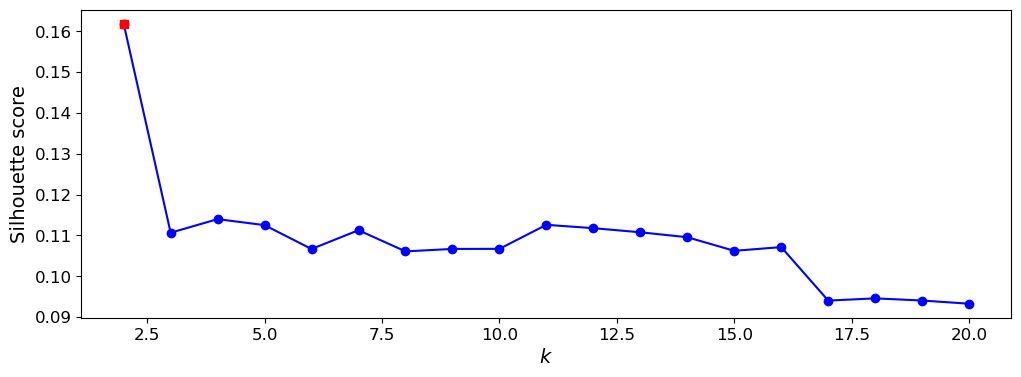

In [82]:
# --------------------------------------------------------------------------------------------------------------------------------------------------
# Create a k-silhouette score diagram (horizontal axis: K values, vertical axis: silhouette score)
# --------------------------------------------------------------------------------------------------------------------------------------------------
# Make a figure with size (12,4)
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(k_list, silhouette_scores, "bo-")

ax.set_xlabel("$k$", fontsize=14)
ax.set_ylabel("Silhouette score", fontsize=14)

ax.plot(best_k, best_score, "rs")
plt.show()

In [83]:
# --------------------------------------------------------------------------------------------------------------------------------------------------
# Iterate through the list of kmeans models and store the model inertias
# --------------------------------------------------------------------------------------------------------------------------------------------------
inertias = [model.inertia_ for model in kmeans_models]

# --------------------------------------------------------------------------------------------------------------------------------------------------
# Get the inertia for the model with the highest silhouette score
# --------------------------------------------------------------------------------------------------------------------------------------------------
best_inertia = inertias[best_index]

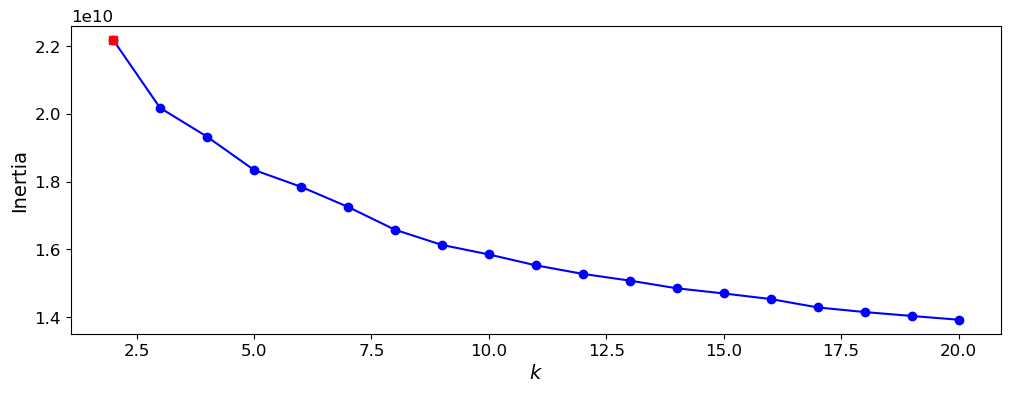

In [84]:
# --------------------------------------------------------------------------------------------------------------------------------------------------
# Create a k-silhouette score diagram (horizontal axis: K values, vertical axis: inertia)
# --------------------------------------------------------------------------------------------------------------------------------------------------
# Make a figure with size (12,4)
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(k_list, inertias, "bo-")

ax.set_xlabel("$k$", fontsize=14)
ax.set_ylabel("Inertia", fontsize=14)

ax.plot(best_k, best_inertia, "rs")

In [85]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, # We'll project onto 2D plane
            random_state=rnd_seed, # We need a random seed
            learning_rate='auto') #Let the algorithm handle the learning rate

# And now get the input data in 2-component reduced form
X_plot = tsne.fit_transform(sub_X)

In [91]:
# --------------------------------------------------------------------------------------------------------------------------------------------------
# Make an empty list to store the three best models
# --------------------------------------------------------------------------------------------------------------------------------------------------
best_models = []

# --------------------------------------------------------------------------------------------------------------------------------------------------
# Use the best_index to get the best model
# --------------------------------------------------------------------------------------------------------------------------------------------------
best_models.append(kmeans_models[best_index])

# --------------------------------------------------------------------------------------------------------------------------------------------------
# Manually retrieve 2nd and 3rd best models
# First use np.argsort() to sort all silhouette scores. The second to last and third to last indices correspond to the second and third best models.
# --------------------------------------------------------------------------------------------------------------------------------------------------second_index,third_index = np.asarray(silhouette_scores).argsort()[-2],np.asarray(silhouette_scores).argsort()[-3]
second_index,third_index = np.argsort(np.asarray(silhouette_scores))[-2], np.argsort(np.asarray(silhouette_scores))[-3]
best_models.append(kmeans_models[second_index])
best_models.append(kmeans_models[third_index])

In [92]:
pred_labels = []
for model in best_models:
    pred_labels.append(model.predict(reduced_X))

In [93]:
import pandas as pd

plot_data = np.stack([X_plot[:,0], X_plot[:,1], sub_y, *pred_labels],axis=1)
df = pd.DataFrame(plot_data, columns=['X1','X2','truth','pred_1','pred_2','pred_3'])

(np.float64(-109.15675735473633),
 np.float64(99.56906509399414),
 np.float64(-83.49195442199706),
 np.float64(89.87460670471191))

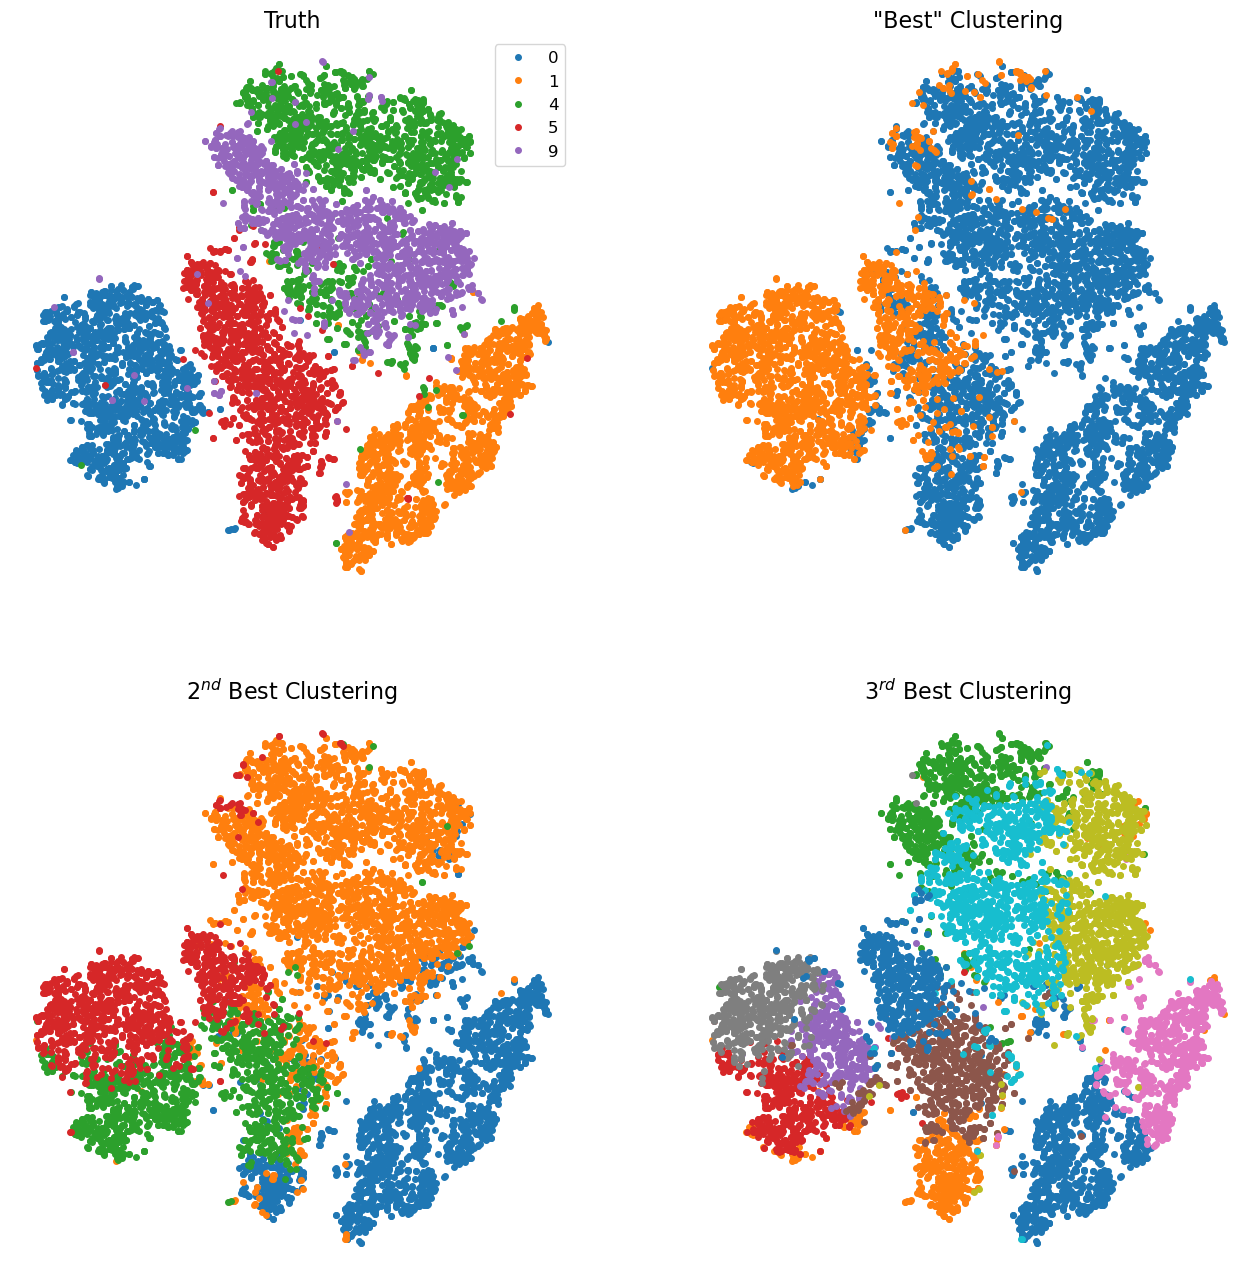

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(16,16))

groups = df.groupby('truth')
for label, group in groups:
    axes[0,0].plot(group.X1, group.X2, marker='o', linestyle='', markersize=4, label=int(label))
axes[0,0].legend(fontsize=12)
axes[0,0].set_title('Truth', fontsize=16)
axes[0,0].axis('off')

groups = df.groupby('pred_1')
for label, group in groups:
    axes[0,1].plot(group.X1, group.X2, marker='o', linestyle='', markersize=4)
axes[0,1].set_title('"Best" Clustering', fontsize=16)
axes[0,1].axis('off')

groups = df.groupby('pred_2')
for label, group in groups:
    axes[1,0].plot(group.X1, group.X2, marker='o', linestyle='', markersize=4)
axes[1,0].set_title('$2^{nd}$ Best Clustering', fontsize=16)
axes[1,0].axis('off')

groups = df.groupby('pred_3')
for label, group in groups:
    axes[1,1].plot(group.X1, group.X2, marker='o', linestyle='', markersize=4)
axes[1,1].set_title('$3^{rd}$ Best Clustering', fontsize=16)
axes[1,1].axis('off')

In [ ]:
################# Excercise 4.4 #################

In [140]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import xarray as xr
import pooch

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [141]:
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as cluster

from matplotlib.colors import LinearSegmentedColormap, ListedColormap
colors = ['royalblue', 'cyan','yellow', 'orange', 'magenta', 'red']
mycmap = ListedColormap(colors)

In [187]:
# Retrieve the files from the cloud using Pooch.
data_url = 'https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q?download=1'
hash = '3f41661c7a087fa7d7af1d2a8baf95c065468f8a415b8514baedda2f5bc18bb5'

files = pooch.retrieve(data_url, known_hash=hash, processor=pooch.Unzip())
[print(filename) for filename in files];

C:\Users\Justine Berg\AppData\Local\pooch\pooch\Cache\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\BPT.npy
C:\Users\Justine Berg\AppData\Local\pooch\pooch\Cache\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\curlA.npy
C:\Users\Justine Berg\AppData\Local\pooch\pooch\Cache\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\curlB.npy
C:\Users\Justine Berg\AppData\Local\pooch\pooch\Cache\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\curlCori.npy
C:\Users\Justine Berg\AppData\Local\pooch\pooch\Cache\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\curlTau.npy
C:\Users\Justine Berg\AppData\Local\pooch\pooch\Cache\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\noiseMask.npy


In [188]:
# Let's read in the variable names from the filepaths
var_names = []
[var_names.append(path.split('/')[-1][:-4]) for path in files]

# And build a dictionary of the data variables keyed to the filenames
data_dict = {}
for idx, val in enumerate(var_names):
    data_dict[val] = np.load(files[idx]).T

#We'll print the name of the variable loaded and the associated shape
[print(f'Varname: {item[0]:<15} Shape: {item[1].shape}') for item in data_dict.items()];

Varname: C:\Users\Justine Berg\AppData\Local\pooch\pooch\Cache\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\BPT Shape: (360, 720)
Varname: C:\Users\Justine Berg\AppData\Local\pooch\pooch\Cache\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\curlA Shape: (360, 720)
Varname: C:\Users\Justine Berg\AppData\Local\pooch\pooch\Cache\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\curlB Shape: (360, 720)
Varname: C:\Users\Justine Berg\AppData\Local\pooch\pooch\Cache\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\curlCori Shape: (360, 720)
Varname: C:\Users\Justine Berg\AppData\Local\pooch\pooch\Cache\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\curlTau Shape: (360, 720)
Varname: C:\Users\Justine Berg\AppData\Local\pooch\pooch\Cache\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I

In [189]:
print(data_dict)

{'C:\\Users\\Justine Berg\\AppData\\Local\\pooch\\pooch\\Cache\\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\\BPT': array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [2.91824577e-10, 2.79597141e-10, 2.67941801e-10, ...,
        3.60130179e-10, 3.29399238e-10, 3.04381556e-10],
       [1.65025216e-09, 1.63083037e-09, 1.61104016e-09, ...,
        1.70639128e-09, 1.68817223e-09, 1.66943716e-09],
       [3.55323559e-10, 3.58131735e-10, 3.60815091e-10, ...,
        3.46706442e-10, 3.49634081e-10, 3.52527302e-10]]), 'C:\\Users\\Justine Berg\\AppData\\Local\\pooch\\pooch\\Cache\\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBS

In [190]:
print("Keys in data_dict:", data_dict.keys())

Keys in data_dict: dict_keys(['C:\\Users\\Justine Berg\\AppData\\Local\\pooch\\pooch\\Cache\\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\\BPT', 'C:\\Users\\Justine Berg\\AppData\\Local\\pooch\\pooch\\Cache\\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\\curlA', 'C:\\Users\\Justine Berg\\AppData\\Local\\pooch\\pooch\\Cache\\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\\curlB', 'C:\\Users\\Justine Berg\\AppData\\Local\\pooch\\pooch\\Cache\\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\\curlCori', 'C:\\Users\\Justine Berg\\AppData\\Local\\pooch\\pooch\\Cache\\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\\curlTau', 'C:\\Users\\Justine Berg\\AppData\\Local\\pooch\\pooch\\Cache\\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\\noiseMask'])


In [191]:
key_mapping = {
    'C:\\Users\\Justine Berg\\AppData\\Local\\pooch\\pooch\\Cache\\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\\BPT': 'BPT',
    'C:\\Users\\Justine Berg\\AppData\\Local\\pooch\\pooch\\Cache\\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\\curlA': 'curlA',
    'C:\\Users\\Justine Berg\\AppData\\Local\\pooch\\pooch\\Cache\\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\\curlB': 'curlB',
    'C:\\Users\\Justine Berg\\AppData\\Local\\pooch\\pooch\\Cache\\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\\curlCori': 'curlCori',
    'C:\\Users\\Justine Berg\\AppData\\Local\\pooch\\pooch\\Cache\\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\\curlTau': 'curlTau',
    'C:\\Users\\Justine Berg\\AppData\\Local\\pooch\\pooch\\Cache\\8a10ee1ae6941d8b9bb543c954c793fa-EUYqUzpIjoJBui02QEo6q1wBSN1Zsi1ofE6I3G4B9LJn_Q.unzip\\noiseMask': 'noiseMask'
}

In [192]:
data_dict = {key_mapping.get(k, k): v for k, v in data_dict.items()}

In [193]:
#data_dict['clusters'] = np.full_like(data_dict['BPT'],np.nan)

In [194]:
ds = xr.Dataset()

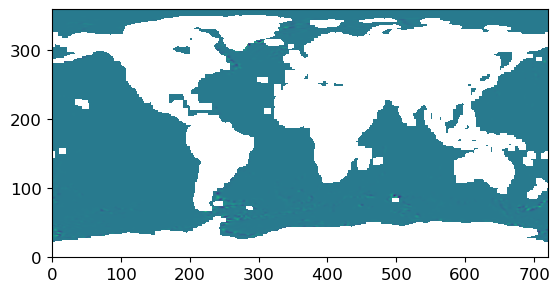

In [195]:
#Complete the code
# Let's print out an image of the Bottom Pressure Torques (BPT)
plt.imshow( data_dict['BPT'] , origin='lower')

In [196]:
# It will also be useful to store and print out the shape of the data
data_shape = data_dict['BPT'].shape
print(data_shape)

(360, 720)


In [197]:
#Complete the code
# Let's prepare the lat and lon axes for our data.

lat_points, lon_points = data_shape

lat = np.linspace(-90, 90, lat_points)
lon = np.linspace(-180, 180, lon_points)

print("Latitude array:", lat)
print("Longitude array:", lon)

Latitude array: [-90.         -89.49860724 -88.99721448 -88.49582173 -87.99442897
 -87.49303621 -86.99164345 -86.4902507  -85.98885794 -85.48746518
 -84.98607242 -84.48467967 -83.98328691 -83.48189415 -82.98050139
 -82.47910864 -81.97771588 -81.47632312 -80.97493036 -80.4735376
 -79.97214485 -79.47075209 -78.96935933 -78.46796657 -77.96657382
 -77.46518106 -76.9637883  -76.46239554 -75.96100279 -75.45961003
 -74.95821727 -74.45682451 -73.95543175 -73.454039   -72.95264624
 -72.45125348 -71.94986072 -71.44846797 -70.94707521 -70.44568245
 -69.94428969 -69.44289694 -68.94150418 -68.44011142 -67.93871866
 -67.43732591 -66.93593315 -66.43454039 -65.93314763 -65.43175487
 -64.93036212 -64.42896936 -63.9275766  -63.42618384 -62.92479109
 -62.42339833 -61.92200557 -61.42061281 -60.91922006 -60.4178273
 -59.91643454 -59.41504178 -58.91364903 -58.41225627 -57.91086351
 -57.40947075 -56.90807799 -56.40668524 -55.90529248 -55.40389972
 -54.90250696 -54.40111421 -53.89972145 -53.39832869 -52.89693

In [198]:
#Complete the code
def np_to_xr(array_name, array, lat, lon):
    #building the xarrray
    da = xr.DataArray(data = array, # Data to be stored

                  #set the name of dimensions for the dataArray
                  dims = ['lat', 'lon'],

                  #Set the dictionary pointing the name dimensions to np arrays
                  coords = {'lat': lat,
                            'lon': lon},

                  name=array_name)
    return da

In [199]:
# The code in the notebook assumes you named your dataset ds. Change it to
# whatever you used!

# Complete the code
for key, item in data_dict.items():
    # Let's make use of our np_to_xr function to get the data as a dataArray
    da = np_to_xr(key, item, lat, lon)

    # Merge the dataSet with the dataArray here!
    ds = xr.merge( [ ds , da ] )

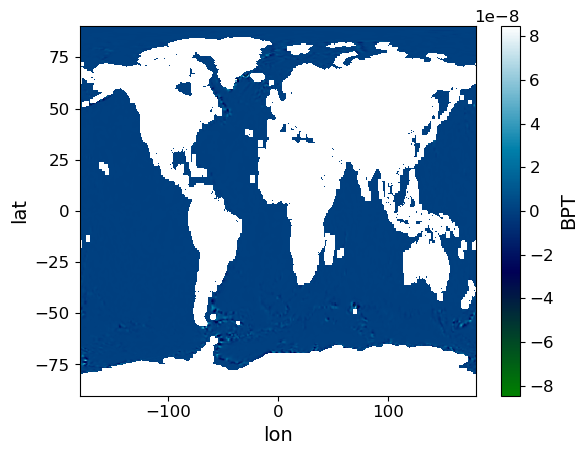

In [200]:
ds.BPT.plot.imshow(cmap='ocean')

In [201]:
print(ds.std())
print(ds.mean())

<xarray.Dataset> Size: 48B
Dimensions:    ()
Data variables:
    BPT        float64 8B 2.161e-09
    curlA      float64 8B 9.017e-10
    curlB      float64 8B 1.529e-10
    curlCori   float64 8B 2.123e-09
    curlTau    float64 8B 1.455e-10
    noiseMask  float64 8B 0.0
<xarray.Dataset> Size: 48B
Dimensions:    ()
Data variables:
    BPT        float64 8B 1.02e-11
    curlA      float64 8B -1.287e-12
    curlB      float64 8B 2.928e-13
    curlCori   float64 8B 7.743e-12
    curlTau    float64 8B -1.696e-11
    noiseMask  float64 8B 1.0


In [202]:
# Complete the code
# Let's store the stacked version of our dataset
stacked = ds.stack( { 'flat_dim' :[ 'lat' , 'lon' ] } )

In [203]:
print(stacked)

<xarray.Dataset> Size: 19MB
Dimensions:    (flat_dim: 259200)
Coordinates:
  * flat_dim   (flat_dim) object 2MB MultiIndex
  * lat        (flat_dim) float64 2MB -90.0 -90.0 -90.0 -90.0 ... 90.0 90.0 90.0
  * lon        (flat_dim) float64 2MB -180.0 -179.5 -179.0 ... 179.0 179.5 180.0
Data variables:
    BPT        (flat_dim) float64 2MB nan nan nan ... 3.496e-10 3.525e-10
    curlA      (flat_dim) float64 2MB nan nan nan ... 1.166e-10 1.146e-10
    curlB      (flat_dim) float64 2MB nan nan nan ... 1.279e-11 1.27e-11
    curlCori   (flat_dim) float64 2MB nan nan nan ... -4.638e-10 -4.647e-10
    curlTau    (flat_dim) float64 2MB nan nan nan ... -1.358e-11 -1.348e-11
    noiseMask  (flat_dim) float64 2MB nan nan nan nan nan ... 1.0 1.0 1.0 1.0


In [204]:
# And verify the shape of our data
print(stacked.to_array().values.shape)

(6, 259200)


In [205]:
# Let's redefine stacked as all the points where noiseMask = 1, since noisemask
# is binary data.

print(f'Dataset shape before processing: {stacked.to_array().values.shape}')

print("Let's do some data cleaning!")
print(f'Points before cleaning: {len(stacked.BPT)}')
stacked = stacked.where(stacked.noiseMask==1, drop=True)
print(f'Points after cleaning: {len(stacked.BPT)}')

Dataset shape before processing: (6, 259200)
Let's do some data cleaning!
Points before cleaning: 259200
Points after cleaning: 149714


In [206]:
# We also no longer need the noiseMask variable, so we can just drop it.

print('And drop the noisemask variable...')
print(f'Before dropping: {stacked.to_array().values.shape}')
stacked = stacked.drop('noiseMask')
print(f'Dataset shape after processing: {stacked.to_array().values.shape}')

And drop the noisemask variable...
Before dropping: (6, 149714)
Dataset shape after processing: (5, 149714)


C:\Users\Justine Berg\AppData\Local\Temp\ipykernel_22240\3420367162.py:5: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  stacked = stacked.drop('noiseMask')


In [207]:
# Convert to numpy array with the correct axis order
input_data = np.moveaxis(stacked.to_array().values, 0, -1)

In [208]:
print(input_data.shape)

(149714, 5)


In [209]:
# Assuming input_data is a numpy array
# Check for NaN values in the first 5 columns
nan_check = np.isnan(input_data[:, :5])

# Count the number of True values (NaN values)
nan_count = np.count_nonzero(nan_check)

# Print the result
print("NaN values in the first 5 columns:\n", nan_check)
print("Number of NaN values in the first 5 columns:", nan_count)

NaN values in the first 5 columns:
 [[False False False False False]
 [False False False False False]
 [False False False False False]
 ...
 [False False False False False]
 [False False False False False]
 [False False False False False]]
Number of NaN values in the first 5 columns: 0


In [210]:
print(input_data.shape)

(149714, 5)


In [211]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [212]:
scaled_input_data = scaler.fit_transform(input_data)

In [213]:
# Assuming input_data is a numpy array
# Check for NaN values in the first 5 columns
nan_check = np.isnan(scaled_input_data[:, :5])

# Count the number of True values (NaN values)
nan_count = np.count_nonzero(nan_check)

# Print the result
print("NaN values in the first 5 columns:\n", nan_check)
print("Number of NaN values in the first 5 columns:", nan_count)

NaN values in the first 5 columns:
 [[False False False False False]
 [False False False False False]
 [False False False False False]
 ...
 [False False False False False]
 [False False False False False]
 [False False False False False]]
Number of NaN values in the first 5 columns: 0


In [214]:
# Complete the code
kmeans = cluster.KMeans(n_clusters =50,  # Number of clusters
                        random_state =42, # setting a random state
                        n_init =10, # Number of initial centroid states to try
                       verbose = 1)   # Verbosity so we know things are working

In [215]:
cluster_labels = kmeans.fit_predict(scaled_input_data)

Initialization complete
Iteration 0, inertia 178539.00982924039.
Iteration 1, inertia 162261.46194163323.
Iteration 2, inertia 158116.00261550417.
Iteration 3, inertia 156154.94948264642.
Iteration 4, inertia 154655.68230869627.
Iteration 5, inertia 153702.13580925073.
Iteration 6, inertia 152994.49606413895.
Iteration 7, inertia 152528.28110496284.
Iteration 8, inertia 152108.36268125832.
Iteration 9, inertia 151717.8292321472.
Iteration 10, inertia 151335.17681823703.
Iteration 11, inertia 150967.8017890668.
Iteration 12, inertia 150535.09686681104.
Iteration 13, inertia 150130.06375057678.
Iteration 14, inertia 149635.23733039678.
Iteration 15, inertia 149153.54438292357.
Iteration 16, inertia 148761.87688258174.
Iteration 17, inertia 148454.9677051048.
Iteration 18, inertia 148201.86773876342.
Iteration 19, inertia 147982.7837860519.
Iteration 20, inertia 147743.02515719735.
Iteration 21, inertia 147451.36197517868.
Iteration 22, inertia 147153.6496246645.
Iteration 23, inertia 146

In [218]:
print(cluster_labels)

[ 4 34  3 ... 41 41 41]


In [216]:
# Complete the code:
processed_ds = ds.unstack()

In [219]:
print(processed_ds)

<xarray.Dataset> Size: 12MB
Dimensions:    (lat: 360, lon: 720)
Coordinates:
  * lat        (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon        (lon) float64 6kB -180.0 -179.5 -179.0 ... 179.0 179.5 180.0
Data variables:
    BPT        (lat, lon) float64 2MB nan nan nan ... 3.496e-10 3.525e-10
    curlA      (lat, lon) float64 2MB nan nan nan ... 1.166e-10 1.146e-10
    curlB      (lat, lon) float64 2MB nan nan nan ... 1.279e-11 1.27e-11
    curlCori   (lat, lon) float64 2MB nan nan nan ... -4.638e-10 -4.647e-10
    curlTau    (lat, lon) float64 2MB nan nan nan ... -1.358e-11 -1.348e-11
    noiseMask  (lat, lon) float64 2MB nan nan nan nan nan ... 1.0 1.0 1.0 1.0


In [221]:
# Add the cluster labels to processed_ds
processed_ds['final_clusters'] = cluster_labels

In [223]:
# Make field filled with -1 vals so unprocessed points are easily retrieved.
# Noise masked applied automatically by using previously found labels as base.
processed_ds['final_clusters'] = (processed_ds.BPT * 0) - 1

# Find the 5 most common cluster labels
top_clusters = processed_ds.groupby('clusters').count().sortby('BPT').tail(5).clusters.values

#Build the set of indices for the cluster data, used for rewriting cluster labels
for idx, label in enumerate(top_clusters):
    #Find the indices where the label is found
    indices = (processed_ds.clusters == label)

    processed_ds['final_clusters'].values[indices] = 4-idx

# Set the remaining unlabeled regions to category 5 "non-linear"
processed_ds['final_clusters'].values[processed_ds.final_clusters==-1] = 5

# Plot the figure
processed_ds.final_clusters.plot.imshow(cmap=mycmap, figsize=(18,8));

KeyError: "No variable named 'clusters'. Variables on the dataset include ['lat', 'lon', 'BPT', 'curlA', 'curlB', 'curlCori', 'curlTau', 'noiseMask', 'final_clusters']"